In [22]:
#Logisticka Regresia
#V tomto pripade pracujem s modelom Logistickej Regresie pre pripad 5 - clennej klasifikacie
#V prvej casti sa mnozina dat delin stratifikovane, no nevyuzivam metodu SMOTE
#Neskor v druhej casti pouzijem metodu SMOTE a opat aplikujem algoritmus Logisticka Regresia

In [24]:
#nacitanie kniznic
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics

# nastavíme zobrazovanie grafov priamo v odstavcoch zápisníka
%matplotlib inline
# inicializujeme knižnicu seaborn
sns.set()
sns.set_style("darkgrid")

In [26]:
#Nacitanie datasetu
data = pd.read_csv("DATA/student_prediction.csv")
#Zobrazenie hlavicky datasetu
data.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [27]:
#Vymazanie stlpca STUDENTID
data.drop(columns = data.columns[0], axis = 1, inplace= True)

In [28]:
#Funkcia new_grade prevedie 8 - clennu klasifikaciu na 5 - clennu pomocou jednoduchych podmienok
def new_grade(grade):
    if grade == 7:
        return 1
    elif grade == 6:
        return 2
    elif grade == 5:
        return 2
    elif grade == 4:
        return 3
    elif grade == 3:
        return 3
    elif grade == 2:
        return 4
    elif grade == 1:
        return 4
    else:
        return 5

In [29]:
#funkciu new_grade aplikujem na atribut GRADE
#Pridam do datasetu atribut NEW_GRADE
data["NEW_GRADE"] = data["GRADE"].apply(new_grade)
data.head(5000)

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,...,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE,NEW_GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,3,2,1,2,1,1,1,1,4
1,2,2,3,3,1,2,2,1,1,1,...,1,3,2,3,2,2,3,1,1,4
2,2,2,2,3,2,2,2,2,4,2,...,1,2,2,1,1,2,2,1,1,4
3,1,1,1,3,1,2,1,2,1,2,...,2,3,2,2,1,3,2,1,1,4
4,2,2,1,3,2,2,1,3,1,4,...,1,2,2,2,1,2,2,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,2,1,2,1,3,3,9,5,2
141,1,1,2,4,2,2,2,1,4,2,...,1,3,2,2,1,5,3,9,5,2
142,1,1,1,4,2,2,2,1,1,1,...,1,3,3,2,1,4,3,9,1,4
143,2,1,2,4,1,1,1,5,2,3,...,1,2,1,2,1,5,3,9,4,3


In [30]:
#Vymazanie atribut GRADE z datasetu 
data = data.drop(['GRADE'], axis = 1)

In [31]:
#Vyvorenie premennej x a y, pricom x su predikujuce atributu a y je predikovany atribut NEW_GRADE
x = data.drop(['NEW_GRADE'], axis = 1)
y = data['NEW_GRADE']


In [32]:
#Rozdelenie mnoziny stratifikovane na trenovaciu a testovaciu 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify=y)

In [33]:
#Vytvorenie modelu
model = LogisticRegression(solver='liblinear', random_state=0)

In [34]:
#Natrenovanie modelu
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [35]:
#Vytvorenie premenej pred, ktora obsahuje predikovane hodnoty atributu NEW_GRADE
pred = model.predict(X_test)
#vypis kontingencnej tabulky
table = pd.crosstab(pred, y_test)
table


NEW_GRADE,1,2,3,4,5
row_0,,,,,
1,1,2,1,1,0
2,1,2,3,1,0
3,1,2,1,4,0
4,1,3,4,12,3
5,1,0,0,0,0


In [36]:
#vypis klasifikacneho reportu
print(classification_report( y_test,pred))

              precision    recall  f1-score   support

           1       0.20      0.20      0.20         5
           2       0.29      0.22      0.25         9
           3       0.12      0.11      0.12         9
           4       0.52      0.67      0.59        18
           5       0.00      0.00      0.00         3

    accuracy                           0.36        44
   macro avg       0.23      0.24      0.23        44
weighted avg       0.32      0.36      0.34        44



AUC for Class 1: 0.6666666666666666
AUC for Class 2: 0.6603174603174604
AUC for Class 3: 0.4
AUC for Class 4: 0.6730769230769231
AUC for Class 5: 0.3089430894308943


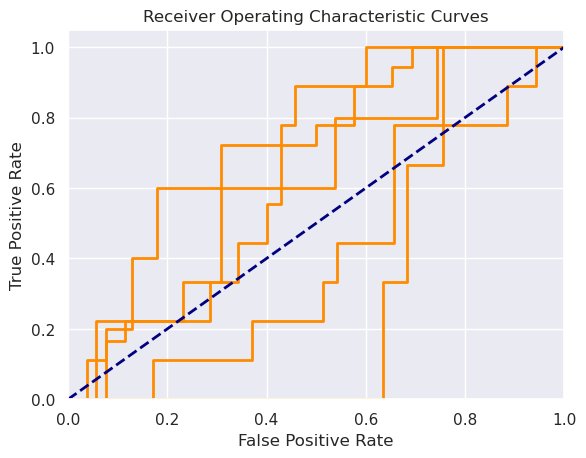

In [37]:
#Graficke zobraznie a zobrazenie hodnot AUC
from sklearn.metrics import roc_curve, auc

y_score = model.predict_proba(X_test)
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5])
n_classes = y_test_bin.shape[1]



fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

Class=3, n=59 (40.690%)
Class=1, n=30 (20.690%)
Class=4, n=8 (5.517%)
Class=2, n=31 (21.379%)
Class=0, n=17 (11.724%)


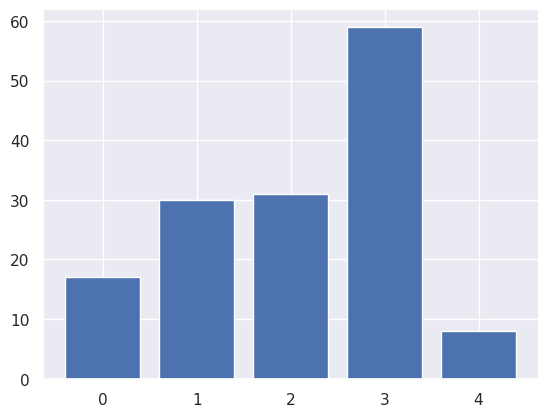

In [38]:
#Tu mozeme vidiet rozdelenie atributu GRADE, ktory je predikovany atribut
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from matplotlib import pyplot
y = LabelEncoder().fit_transform(y)
# ciselny vypis
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# graf distribucie hodnot atribut NEW_GRADE
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [39]:
#V tejto casti uz na dataset aplikujem metodu SMOTE

In [40]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [41]:
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

Class=3, n=59 (20.000%)
Class=1, n=59 (20.000%)
Class=4, n=59 (20.000%)
Class=2, n=59 (20.000%)
Class=0, n=59 (20.000%)


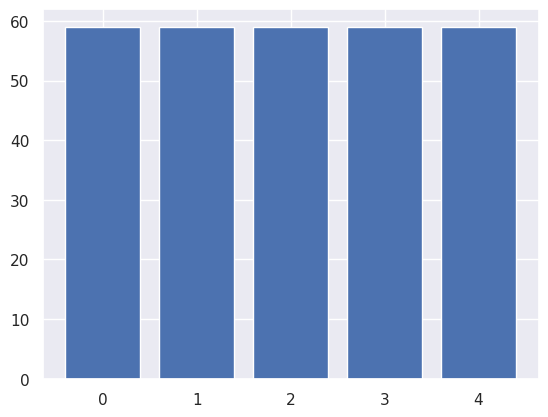

In [42]:
#Pouzitie metody SMOTE, ktora zabezpecila ze vsetky triedy mali rovnake mnozstvo poloziek
y = LabelEncoder().fit_transform(y)
# transformacia datasetu
oversample = SMOTE()
X, y = oversample.fit_resample(x, y)
# ciselny vypis distribucie hodnot atribut NEW_GRADE
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# graf distribucie hodnot atribut NEW_GRADE
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [43]:
#Opat stratifikovane rozdelenie mnoziny na trenovaciu a testovaciu
x_train, x_test, Y_train,Y_test = train_test_split(X,y,test_size = 0.3, random_state = 0, stratify = y)

In [44]:
#Vytvorenie modelu 2
model2 = LogisticRegression(solver='liblinear', random_state=0)

In [45]:
#Natrenovanie modelu 2
model2.fit(x_train, Y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [47]:
##Vytvorenie premenej pred2, ktora obsahuje predikovane hodnoty atribut NEW_GRADE
pred2 = model2.predict(x_test)

In [48]:
#Vypis kontingencnej tabulky
table = pd.crosstab( pred2, Y_test)
table

col_0,0,1,2,3,4
row_0,,,,,
0,16,6,3,0,0
1,1,7,3,3,0
2,0,2,6,6,1
3,0,3,5,7,0
4,1,0,0,2,17


In [49]:
#Vypis klasifikacneho reportu
print(classification_report(Y_test, pred2))

              precision    recall  f1-score   support

           0       0.64      0.89      0.74        18
           1       0.50      0.39      0.44        18
           2       0.40      0.35      0.38        17
           3       0.47      0.39      0.42        18
           4       0.85      0.94      0.89        18

    accuracy                           0.60        89
   macro avg       0.57      0.59      0.58        89
weighted avg       0.57      0.60      0.58        89

